# Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import datetime  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# the name of the dataset
name = 'mergedData041022'

In [3]:
# read the data to a dataframe
data = pd.read_csv('data/' + name + '.csv')

### Dates the data covers

In [5]:
#find the date of the first listing
first = data["creation_timestamp"].min()
datetime.date.fromtimestamp(first)

datetime.date(2022, 3, 23)

In [6]:
#find the date of the last listing
last = data["creation_timestamp"].max()
datetime.date.fromtimestamp(last)

datetime.date(2022, 4, 10)

### Clean Up Columns

In [7]:
#rename columns to distinguish between attributes of the listings vs attributes of the shops
data = data.rename(columns={'title_x':'title_listing','num_favorers_x':'num_favorers_listing','title_y':'title_shop','num_favorers_y':'num_favorers_shop'})

In [8]:
#look at unique values in a single column and other characteristics
column = "num_favorers_listing"
values = list(set(data[column]))
#values
#len(values)
max(values)

26530

In [9]:
#Get URL for the shop for a specific listing
#This is the url for the shop with the highest number of favorers

data[data['num_favorers_listing'] == max(values)]['url']

3619    https://www.etsy.com/shop/juliaedean
Name: url, dtype: object

### Clean up the data

In [10]:
#drop irrelevant columns
data = data.drop(columns = ['Unnamed: 0','is_vacation', 'vacation_message', 'sale_message',])

In [11]:
#remove duplicate listings, keep the most recent
data = data[data.duplicated(subset='listing_id', keep='first')==False]

In [12]:
#identify columns that contain missing data
columns = data.columns

missing = []
for column in columns:
    null = data[data[column].isnull()]
    if len(null)!=0:
        missing.append(column)
        
missing

['title_shop',
 'announcement',
 'shipping_from_country_iso',
 'shop_location_country_iso',
 'review_average',
 'review_count']

In [13]:
"""the first four columns having missing data shouldn't affect the analysis, 
but I want to filter out the shops that have zero reviews (and therefore no review average)"""
missing

['title_shop',
 'announcement',
 'shipping_from_country_iso',
 'shop_location_country_iso',
 'review_average',
 'review_count']

In [14]:
# remove listings from shops with no reviews
data = data[data['review_average'].notnull()]

In [15]:
# Save the cleaned data
#data.to_csv('data/' + name + 'clean.csv')

## Visualize and Explore

### Explore attributes of the shops

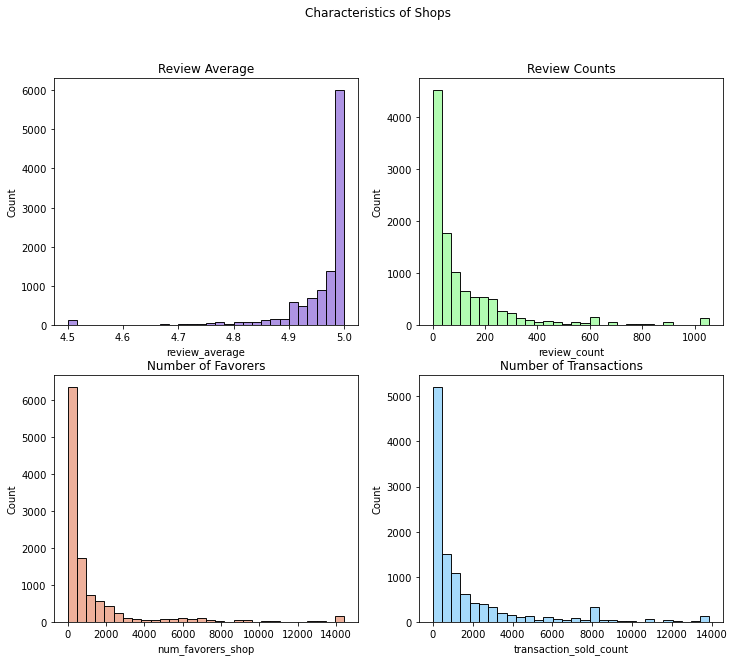

In [30]:
# Plot info about shops
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
fig.suptitle('Characteristics of Shops')

# plot the review averages
sns.histplot(ax=axes[0,0], data=np.clip(data['review_average'],data['review_average'].quantile(.01),5.0), 
             bins = 30, color='mediumpurple')
axes[0,0].set_title('Review Average')

# plot the review counts
sns.histplot(ax=axes[0,1], data=np.clip(data['review_count'],0,data['review_count'].quantile(.99)), 
             bins = 30, color = 'palegreen')
axes[0,1].set_title('Review Counts')

# plot the number of favorers
sns.histplot(ax=axes[1,0], data=np.clip(data['num_favorers_shop'],0,data['num_favorers_shop'].quantile(.99)), 
             bins = 30, color = 'darksalmon')
axes[1,0].set_title('Number of Favorers')

# plot the number of transactions
sns.histplot(ax=axes[1,1], data=np.clip(data['transaction_sold_count'],0,data['transaction_sold_count'].quantile(.99)), 
             bins = 30, color = 'lightskyblue')
axes[1,1].set_title('Number of Transactions')

plt.show()

In [25]:
print('The median of the review averages is ' + str(np.median(data['review_average'])))
print('The median number of reviews is ' + str(np.median(data['review_count'])))
print('The median number of favorers is ' + str(np.median(data['num_favorers_shop'])))
print('The median number of transactions is ' + str(np.median(data['transaction_sold_count'])))

The median of the review averages is 4.9869
The median number of reviews is 58.0
The median number of favorers is 333.0
The median number of transactions is 569.5


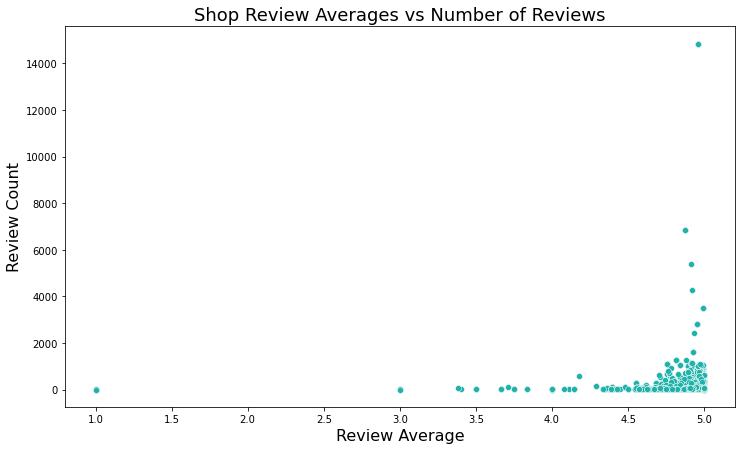

In [16]:
# Plot Review Averages vs Number of Reviews
plt.figure(figsize=(12, 7))

plt.title("Shop Review Averages vs Number of Reviews", fontdict={"fontsize":18})

plt.xlabel("Review Average", fontdict={"fontsize":16})
plt.ylabel("Review Count", fontdict={"fontsize":16})

sns.scatterplot(data=data, x='review_average', y='review_count', color = 'lightseagreen')

plt.show()

### Explore attributes of the listings

In [28]:
# calculate prices and filter by data in US dollars:
data['price'] = data['price.amount']/data['price.divisor']
USdata = data[data['price.currency_code'] == "USD"].reset_index(drop=True)

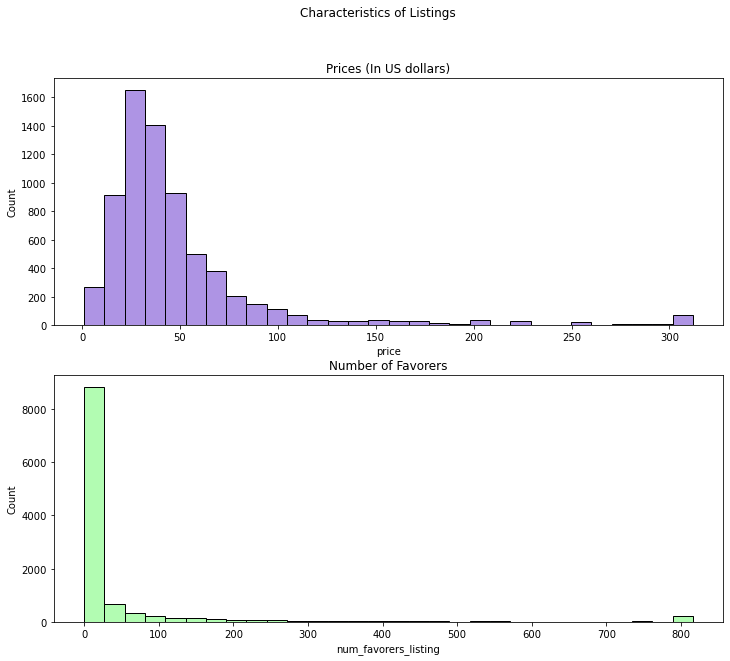

In [31]:
# Plot info about listing
fig, axes = plt.subplots(2, figsize = (12, 10))
fig.suptitle('Characteristics of Listings')

# plot the prices
sns.histplot(ax=axes[0], data=np.clip(USdata['price'],0,USdata['price'].quantile(.99)), bins = 30, color='mediumpurple')
axes[0].set_title('Prices (In US dollars)')

# plot the number of favorers
sns.histplot(ax=axes[1], data=np.clip(data['num_favorers_listing'],0,data['num_favorers_listing'].quantile(.98)), bins = 30, color = 'palegreen')
axes[1].set_title('Number of Favorers')

plt.show()

In [36]:
print('The median of the prices in US Dollars is ' + str(round(np.median(USdata['price']),2)))
print('The median number of favorers is ' + str(np.median(data['num_favorers_listing'])))

The median of the prices in US Dollars is 37.64
The median number of favorers is 4.0
